In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np
import re
# Read the image

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

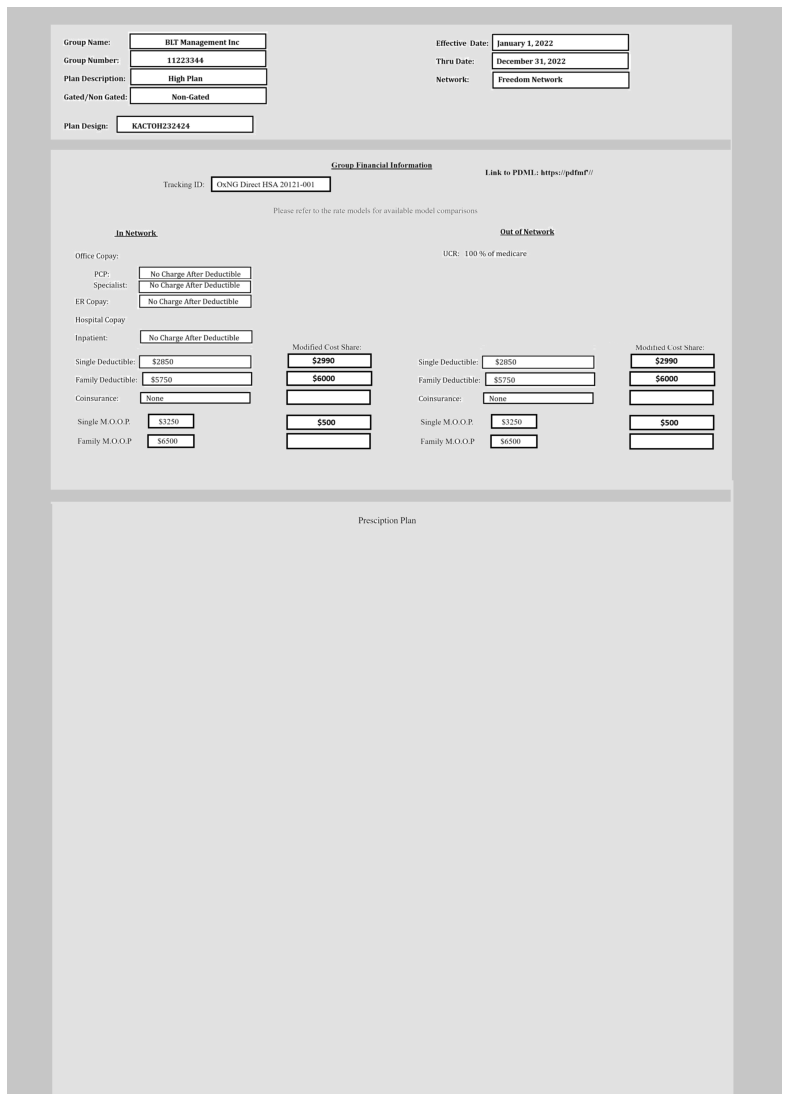

In [167]:
# Read the image using OpenCV
image = cv2.imread(r"C:\Users\Subhadeep\Downloads\subha.jpeg")

height, width, _ = image.shape
crop_height = int(height * 0.5)

# Crop the top 40% of the image
cropped_image = image

# Convert the image to grayscale
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using matplotlib

plt.figure(figsize=(20,20))
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()



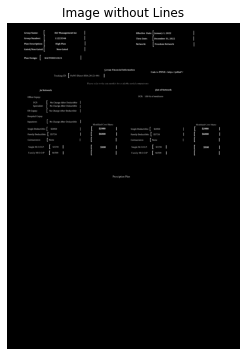

In [168]:
class LineRemover:
    def __init__(self, image_with_padding_path):
        self.image_with_padding = cropped_image
        self.grey = None
        self.thresholded_image = None
        self.inverted_image = None

    def grayscale_image(self):
        self.grey = cv2.cvtColor(self.image_with_padding, cv2.COLOR_BGR2GRAY)

    def threshold_image(self):
        self.thresholded_image = cv2.threshold(self.grey, 127, 255, cv2.THRESH_BINARY)[1]

    def invert_image(self):
        self.inverted_image = cv2.bitwise_not(self.thresholded_image)

    def display_image(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.inverted_image, cv2.COLOR_BGR2RGB))
        plt.title('Inverted Binary Image')
        plt.axis('off')
        plt.show()
        
    def erode_vertical_lines(self):
        hor = np.array([[1,1,1,1,1,1]])
        self.vertical_lines_eroded_image = cv2.erode(self.inverted_image, hor, iterations=10)
        self.vertical_lines_eroded_image = cv2.dilate(self.vertical_lines_eroded_image, hor, iterations=10)

    def display_image_with_eroded_vertical_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.vertical_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with Vertical Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def erode_horizontal_lines(self):
        ver = np.array([[1], [1], [1], [1], [1], [1], [1]])
        self.horizontal_lines_eroded_image = cv2.erode(self.inverted_image, ver, iterations=10)
        self.horizontal_lines_eroded_image = cv2.dilate(self.horizontal_lines_eroded_image, ver, iterations=10)
        
    def display_image_with_eroded_horizontal_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.horizontal_lines_eroded_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with horizontal Lines Eroded')
        plt.axis('off')
        plt.show()
        
    def combine_eroded_images(self):
        self.combined_image = cv2.add(self.vertical_lines_eroded_image, self.horizontal_lines_eroded_image)

    def display_image_with_combined_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image, cv2.COLOR_BGR2RGB))
        plt.title('Image with combined eroded lines')
        plt.axis('off')
        plt.show()
    def dilate_combined_image_to_make_lines_thicker(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.combined_image_dilated = cv2.dilate(self.combined_image, kernel, iterations=2)

    def display_thickened_lines(self):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.combined_image_dilated, cv2.COLOR_BGR2RGB))
        plt.title('Image with Thickened Lines')
        plt.axis('off')
        plt.show()
        
    def subtract_combined_and_dilated_image_from_original_image(self):
        self.image_without_lines = cv2.subtract(self.inverted_image, self.combined_image_dilated)
        
    def display_image_without_lines(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines, cv2.COLOR_BGR2RGB))
        plt.title('Image without Lines')
        plt.axis('off')
        plt.show()
    def remove_noise_with_erode_and_dilate(self):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
        self.image_without_lines_noise_removed = cv2.erode(self.image_without_lines, kernel, iterations=1)
        self.image_without_lines_noise_removed = cv2.dilate(self.image_without_lines_noise_removed, kernel, iterations=1)
        
    def display_image_without_noise(self, image):
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(self.image_without_lines_noise_removed, cv2.COLOR_BGR2RGB))
        plt.title('Image without noise')
        plt.axis('off')
        plt.show()

#img1 = cv2.imread('part1.jpg')
# Instantiate the class
line_remover = LineRemover(cropped_image)

# Call the preprocessing methods
line_remover.grayscale_image()
line_remover.threshold_image()
line_remover.invert_image()
line_remover.erode_vertical_lines()
line_remover.erode_horizontal_lines()
line_remover.combine_eroded_images()
line_remover.dilate_combined_image_to_make_lines_thicker()
line_remover.subtract_combined_and_dilated_image_from_original_image()

# Display the image without lines
line_remover.display_image_without_lines(line_remover.image_without_lines)

In [169]:
import re

text = pytesseract.image_to_string(line_remover.image_without_lines,config='--psm 6')
def clean_text(text):
    # Remove unwanted characters and extra spaces
    pattern = r'(?<=\.)0(?=\.)'

    # Replace zeroes with 'O' using re.sub()
    text = re.sub(pattern, 'O', text)
    cleaned_text = re.sub(r'[|\[\]]', '', text)
    
    # Normalize whitespace
    #cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    
    # Fix OCR errors and formatting issues
    #cleaned_text = cleaned_text.replace('l', 'l')  # Replace 'l' with '1'
    cleaned_text = cleaned_text.replace('| |', '')  # Remove extra '|'
    #cleaned_text = cleaned_text.replace('OxNG', 'OING')  # Fix OCR error
    
    return cleaned_text.strip()  # Strip leading and trailing whitespace

# Original text

# Cleaned text
cleaned_text = clean_text(text)


word_list=cleaned_text.split('\n')


sded_pattern = r"Single Deductible:(.+?)(?=Single Deductible|$)"
fded_pattern = r"Family Deductible:(.+?)(?=Family Deductible|$)"
smoop_pattern = r"Single M.O.O.P.(.+?)(?=Single M.O.O.P.|$)"
fmoop_pattern = r"Family M.O.O.P.(.+?)(?=Family M.O.O.P|$)"
coins_pattern = r"Coinsurance:(.+?)(?=Coinsurance|$)"
group_pattern = r"Group Name:(.+?)(?=Effective Date|$)"
eff_date_pattern = r"Effective Date:(.+?)(?=Group Number|$)"
group_num_pattern = r"Group Number:(.+?)(?=Thru Date|$)"
thru_date_pattern = r"Thru Date:(.+?)(?=Plan Description|$)"
plan_desc_pattern = r"Plan Description:(.+?)(?=Network|$)"
network_pattern = r"Network:(.+?)(?=Plan Design|$)"
plan_design_pattern = r"Plan Design:(.+?)(?=Tracking ID|$)"
tracking_id_pattern = r"Tracking ID:(.+?)(?=UCR|$)"
ucr_pattern = r"UCR:(.+?)(?=PCP|$)"
pcp_pattern = r"PCP:(.+?)(?=Specialist|$)"
specialist_pattern = r"Specialist:(.+?)(?=ER Copay|$)"
er_copay_pattern = r"ER Copay:(.+?)(?=Hospital Copay|$)"

deductible_dict = {}

# Assuming 'word_list' contains the text you provided

for line in word_list:
    matches1 = re.findall(sded_pattern, line)
    matches2 = re.findall(fded_pattern, line)
    matches3 = re.findall(smoop_pattern, line)
    matches4 = re.findall(fmoop_pattern, line)
    matches5 = re.findall(coins_pattern, line)
    matches6 = re.findall(group_pattern, line)
    matches7 = re.findall(eff_date_pattern, line)
    matches8 = re.findall(group_num_pattern, line)
    matches9 = re.findall(thru_date_pattern, line)
    matches10 = re.findall(plan_desc_pattern, line)
    matches11 = re.findall(network_pattern, line)
    matches12 = re.findall(plan_design_pattern, line)
    matches13 = re.findall(tracking_id_pattern, line)
    matches14 = re.findall(ucr_pattern, line)
    matches15 = re.findall(pcp_pattern, line)
    matches16 = re.findall(specialist_pattern, line)
    matches17 = re.findall(er_copay_pattern, line)
    
    if matches1:
        for match in matches1:
            deductible_key = "Single Deductible"
            deductible_value = match.strip()
            if deductible_key not in deductible_dict:
                deductible_dict[deductible_key] = []
            deductible_dict[deductible_key].append(deductible_value)

    if matches2:
        for match in matches2:
            deductible_key = "Family Deductible"
            deductible_value = match.strip()
            if deductible_key not in deductible_dict:
                deductible_dict[deductible_key] = []
            deductible_dict[deductible_key].append(deductible_value)

    if matches3:
        for match in matches3:
            deductible_key = "Single MOOP"
            deductible_value = match.strip()
            if deductible_key not in deductible_dict:
                deductible_dict[deductible_key] = []
            deductible_dict[deductible_key].append(deductible_value)
            
    if matches4:
        for match in matches4:
            deductible_key = "Family MOOP"
            deductible_value = match.strip()
            if deductible_key not in deductible_dict:
                deductible_dict[deductible_key] = []
            deductible_dict[deductible_key].append(deductible_value)            

    if matches5:
        for match in matches5:
            deductible_key = "Coinsurance"
            deductible_value = match.strip()
            if deductible_key not in deductible_dict:
                deductible_dict[deductible_key] = []
            deductible_dict[deductible_key].append(deductible_value) 
    
    if matches6:
        for match in matches6:
            group_key = "Group Name"
            group_value = match.strip()
            if group_key not in deductible_dict:
                deductible_dict[group_key] = []
            deductible_dict[group_key].append(group_value)
    
    if matches7:
        for match in matches7:
            eff_date_key = "Effective Date"
            eff_date_value = match.strip()
            if eff_date_key not in deductible_dict:
                deductible_dict[eff_date_key] = []
            deductible_dict[eff_date_key].append(eff_date_value)
            
    if matches8:
        for match in matches8:
            group_num_key = "Group Number"
            group_num_value = match.strip()
            if group_num_key not in deductible_dict:
                deductible_dict[group_num_key] = []
            deductible_dict[group_num_key].append(group_num_value)
    
    if matches9:
        for match in matches9:
            thru_date_key = "Thru Date"
            thru_date_value = match.strip()
            if thru_date_key not in deductible_dict:
                deductible_dict[thru_date_key] = []
            deductible_dict[thru_date_key].append(thru_date_value)
            
    if matches10:
        for match in matches10:
            plan_desc_key = "Plan Description"
            plan_desc_value = match.strip()
            if plan_desc_key not in deductible_dict:
                deductible_dict[plan_desc_key] = []
            deductible_dict[plan_desc_key].append(plan_desc_value)
            
    if matches11:
        for match in matches11:
            network_key = "Network"
            network_value = match.strip()
            if network_key not in deductible_dict:
                deductible_dict[network_key] = []
            deductible_dict[network_key].append(network_value)
    
    if matches12:
        for match in matches12:
            plan_design_key = "Plan Design"
            plan_design_value = match.strip()
            if plan_design_key not in deductible_dict:
                deductible_dict[plan_design_key] = []
            deductible_dict[plan_design_key].append(plan_design_value)
    
    if matches13:
        for match in matches13:
            tracking_id_key = "Tracking ID"
            tracking_id_value = match.strip()
            if tracking_id_key not in deductible_dict:
                deductible_dict[tracking_id_key] = []
            deductible_dict[tracking_id_key].append(tracking_id_value)
    
    if matches14:
        for match in matches14:
            ucr_key = "UCR"
            ucr_value = match.strip()
            if ucr_key not in deductible_dict:
                deductible_dict[ucr_key] = []
            deductible_dict[ucr_key].append(ucr_value)
    
    if matches15:
        for match in matches15:
            pcp_key = "PCP"
            pcp_value = match.strip()
            if pcp_key not in deductible_dict:
                deductible_dict[pcp_key] = []
            deductible_dict[pcp_key].append(pcp_value)
    
    if matches16:
        for match in matches16:
            specialist_key = "Specialist"
            specialist_value = match.strip()
            if specialist_key not in deductible_dict:
                deductible_dict[specialist_key] = []
            deductible_dict[specialist_key].append(specialist_value)
    
    if matches17:
        for match in matches17:
            er_copay_key = "ER Copay"
            er_copay_value = match.strip()
            if er_copay_key not in deductible_dict:
                deductible_dict[er_copay_key] = []
            deductible_dict[er_copay_key].append(er_copay_value)

new_data = {}

# Extracting and organizing the values
for key, values in deductible_dict.items():
    if key == 'Single Deductible' or key == 'Family Deductible' or key == 'Coinsurance' or key == 'Single MOOP' or key == 'Family MOOP':
        
        # Extract the first value
        new_data['IN ' + key] = values[0]
        # Extract the second value
        new_data['OON ' + key] = values[1]
    else:
        new_data[key] = values

# Remove $ from each value
for key, value in data.items():
    new_data[key] = value.replace('$', '')

for key, value in new_data.items():
    try:
    # Check if value contains only digits
        if value.replace(' ', '').isdigit():
        # Split the value by space to get individual numbers
            values = value.split()
        # If there are two values, keep only the last one
            if len(values) == 2:
                new_data[key] = values[1]
    except:
        continue
            

new_data

{'Group Name': ['BLT Management Inc'],
 'Effective Date': ['January 1, 2022'],
 'Group Number': ['11223344'],
 'Thru Date': ['December 31, 2022'],
 'Plan Description': ['High Plan'],
 'Network': ['Freedom Network'],
 'Plan Design': ['KACTOH232424'],
 'Tracking ID': ['OxNG Direct HSA 20121-001'],
 'UCR': ['100% of medicare'],
 'PCP': ['No Charge After Deductible'],
 'Specialist': ['l No Charge After Deductible'],
 'ER Copay': ['No Charge After Deductible'],
 'IN Single Deductible': '2990',
 'OON Single Deductible': '2990',
 'IN Family Deductible': '6000',
 'OON Family Deductible': '6000',
 'IN Coinsurance': 'None',
 'OON Coinsurance': 'None',
 'IN Single MOOP': '1500',
 'OON Single MOOP': '500',
 'IN Family MOOP': '6500',
 'OON Family MOOP': '6500'}